<a href="https://colab.research.google.com/github/VictoriaOAbel/Analyses/blob/main/Learn_how_to_model_and_price_bonds_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan Valuation in Python

In [ ]:
# Data Preparation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import plotly.express as px

In [ ]:
class Loan:
  def __init__(self, notional, redemption, ir):
    self.notional=notional
    self.redemption=redemption
    self.ir=ir

In [ ]:
loan = Loan(100,105,0.04)
print(loan.notional)
print(loan.redemption)
print(loan.ir)

100
105
0.04


In [ ]:
loan

In [ ]:
class Loan:
  def __init__(self, notional, redemption, ir):
    self.notional=notional
    self.redemption=redemption
    self.ir=ir

  def FV(self):
    return self.redemption - self.notional*(1+self.ir)

In [ ]:
loan = Loan(100,105,0.04)
loan.FV()

1.0

In [ ]:
class Loan:
  def __init__(self, notional, redemption, ir):
    self.notional=notional
    self.redemption=redemption
    self.ir=ir

  def FV(self):
    return self.redemption - self.notional*(1+self.ir)

  def PV(self):
    return self.redemption/(1+self.ir) - self.notional

In [ ]:
loan = Loan(100,105,0.04)
loan.PV()

0.9615384615384528

In [ ]:
class Loan:
  def __init__(self, notional, redemption, ir):
    self.notional=notional
    self.redemption=redemption
    self.ir=ir

  def FV(self):
    return self.redemption - self.notional*(1+self.ir)

  def PV(self):
    return self.redemption/(1+self.ir) - self.notional

  def DF(self):
    return 1/(1+self.ir)

In [ ]:
# NOTE: PV = FV*DF

In [ ]:
loan.ir=0.1
loan.PV()

-4.545454545454547

In [ ]:
loan.ir=0.01
loan.PV()

3.960396039603964

In [ ]:
loan = Loan(100,105,0.04) # Re-instantiate loan with the updated class definition
loan.ir=0.01
loan.DF()

0.9900990099009901

Zero Coupon Bond Concept and Valuation

In [ ]:
import math as m
class Zero:
  def __init__(self, maturity):
    self.maturity=maturity

  def YTM(self):
    return m.pow(100/price, 1/self.maturity)-1

In [ ]:
import math as m
class Zero:
  def __init__(self, maturity):
    self.maturity=maturity

  def YTM(self, price):
    return m.pow(100/price, 1/self.maturity)-1

short = Zero(2)
long = Zero(10)
short.YTM(90)

0.05409255338945984

In [ ]:
long.YTM(60)

0.05240977914892553

In [ ]:
import math as m
class Zero:
  def __init__(self, maturity):
    self.maturity=maturity

  def YTM(self, price):
    return m.pow(100/price, 1/self.maturity)-1

  def Price(self, ytm):
    return 100/m.pow(1+ytm, self.maturity)

  short = Zero(2)
  long = Zero(10)
  short.YTM(90)

In [ ]:
short.YTM(90)

0.05409255338945984

In [ ]:
import math as m
class Zero:
  def __init__(self, maturity):
    self.maturity=maturity

  def YTM(self, price):
    return m.pow(100/price, 1/self.maturity)-1

  def Price(self, ytm):
    return 100/m.pow(1+ytm, self.maturity)

short = Zero(2)
long = Zero(10)
long.Price(short.YTM(90))

59.04899999999997

In [ ]:
long.YTM(59)

0.05418006396907016

Yield Curve in Python

In [ ]:
!pip3 install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
maturities = [2, 5, 10, 30]
yields = [0.0249, 0.0246, 0.0266, 0.0306] # Google search US Treasury Bond Prices

Text(0, 0.5, 'Yields')

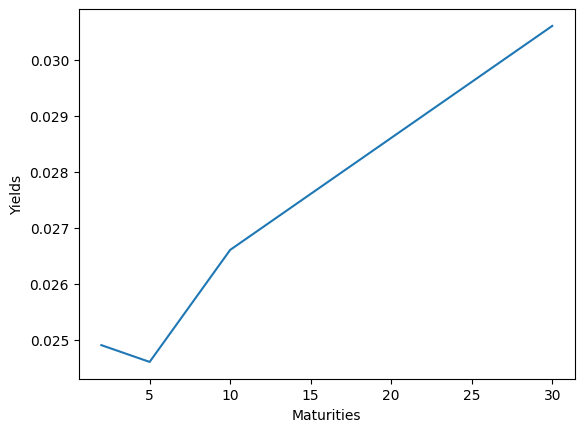

In [ ]:
plt.plot(maturities, yields)
plt.xlabel('Maturities')
plt.ylabel('Yields')

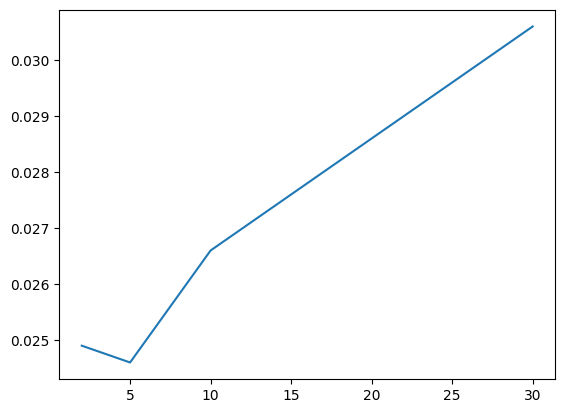

In [ ]:
#OR
plt.plot(maturities, yields)
plt.show()

In [ ]:
bonds = [Zero(i) for i in maturities]
bonds

In [ ]:
bonds[2]

In [ ]:
# prices = [bond.Price(ytm) for bond, ytm in zip(bonds, yields)]
# prices = [bonds[i].Price(yields[i]) for i in range(len(maturities))]
prices = [bonds[i].Price(yields[i]) for i in range(0,4)]
prices

[95.20001432569816, 88.55809022179105, 76.91081274906361, 40.485159652524025]

In [ ]:
maturities.pop(2)

10

In [ ]:
maturities

[2, 5, 30]

In [ ]:
yields = [0.0249, 0.0246, 0.0266, 0.0306]

In [ ]:
marketYield = yields.pop(2)
marketYield

0.0266

In [ ]:
yields

[0.0249, 0.0246, 0.0306]

In [ ]:
marketPrice = prices.pop(2)
marketPrice

76.91081274906361

In [ ]:
import numpy as np

In [ ]:
# interpolatedPrices = np.interp(maturities, maturities, prices)
interpolatedPrices = np.interp(10, maturities, prices)
interpolatedPrices

np.float64(78.94350410793764)

In [ ]:
interpolatedYields = np.interp(10, maturities, yields)
interpolatedYields

np.float64(0.0258)

In [ ]:
priceFromInterpolatedYield = bonds[2].Price(interpolatedYields)
priceFromInterpolatedYield

77.5127335130973

In [ ]:
plt.show()

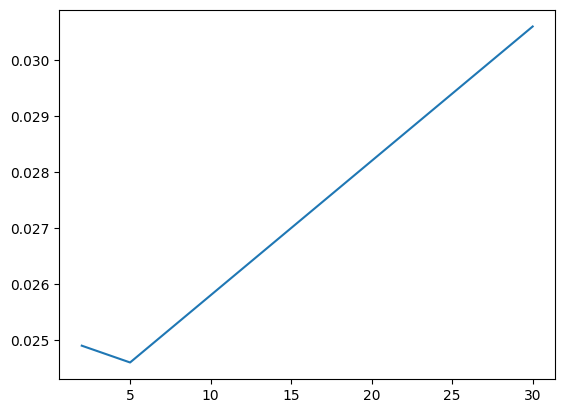

In [ ]:
plt.plot(maturities, yields)
plt.show()

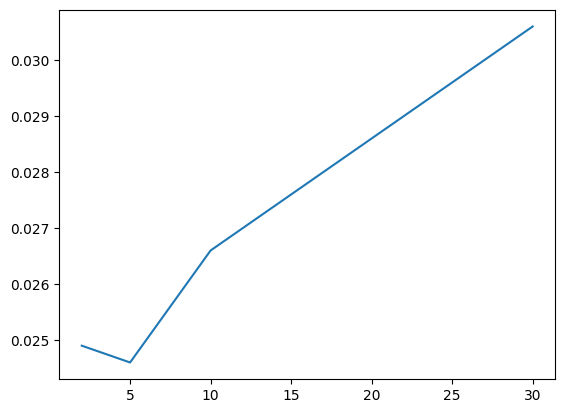

In [ ]:
plt.show()
maturities=[2,5,10,30]
yields=[0.0249, 0.0246, 0.0266, 0.0306]
plt.plot(maturities, yields)

Fixed Coupon Bond using Newton-Rhapson Method

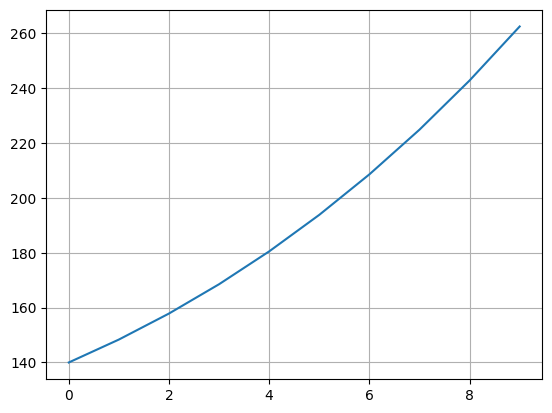

In [ ]:
import math as m

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

bond = Bond(10, 4)
# print(bond.pv(0.04))

ir = range(10)
pvs = [bond.pv(i*0.01) for i in ir]

plt.plot(ir, pvs)
plt.grid(True)
plt.show()

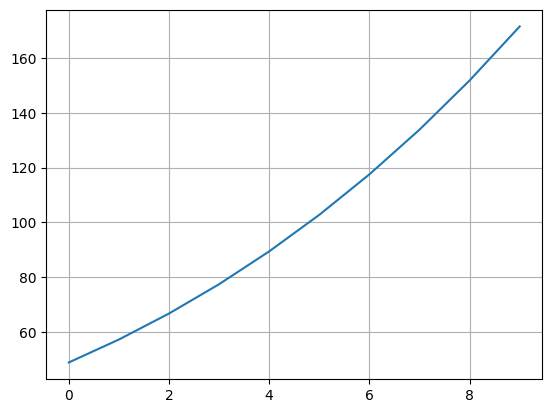

In [ ]:
import math as m

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

bond = Bond(10, 4)
# print(bond.pv(0.04))

price = 91
ir = range(10)
pvs = [bond.pv(i*0.01) -price for i in ir]
#tangent = [0.04 for i in ir]

plt.plot(ir, pvs)
plt.grid(True)
plt.show()

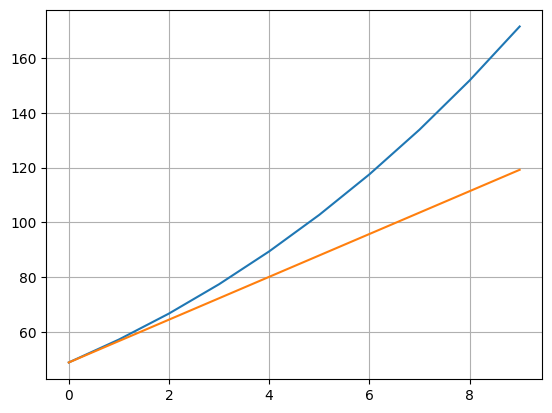

In [ ]:
import math as m

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

  def pv_derivative(self, r):
    sum_deriv = 100 * self.maturity * m.pow(1+r, self.maturity - 1)
    for i in range(1, self.maturity+1):
      sum_deriv += self.coupon * (-i) * m.pow(1+r, -i - 1)
    return sum_deriv

bond = Bond(10, 4)
# print(bond.pv(0.04))

price = 91
ir = range(10)

pvs = [bond.pv(i*0.01) - price for i in ir]
tangent = [bond.pv(0) - price + i*0.01*bond.pv_derivative(0) for i in ir]

plt.plot(ir, pvs)
plt.plot(ir, tangent)
plt.grid(True)
plt.show()

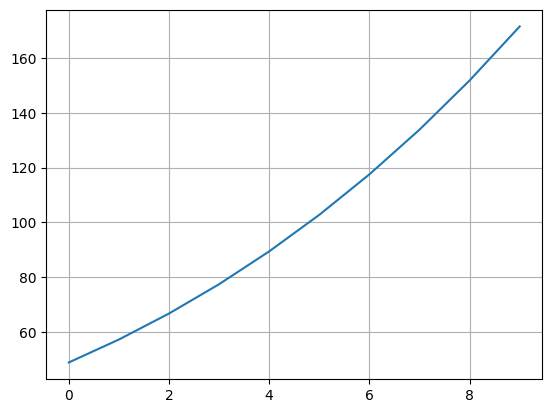

In [2]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

  def pv_derivative(self, r):
    sum = -self.maturity * 100 * m.pow(1+r, -self.maturity - 1)
    for i in range(1, self.maturity+1):
      sum += -i * self.coupon * m.pow(1+r, -i-1)
    return round(sum,2)

bond = Bond(10, 4)
# print(bond.pv(0.04))

price = 91
ir = range(10)

pvs = [bond.pv(i*0.01) - price for i in ir]
# tangent = [bond.pv(0) - price + i*0.01*bond.pv_derivative(0) for i in ir]

plt.plot(ir, pvs)
# plt.plot(ir, tangent)
plt.grid(True)
plt.show()

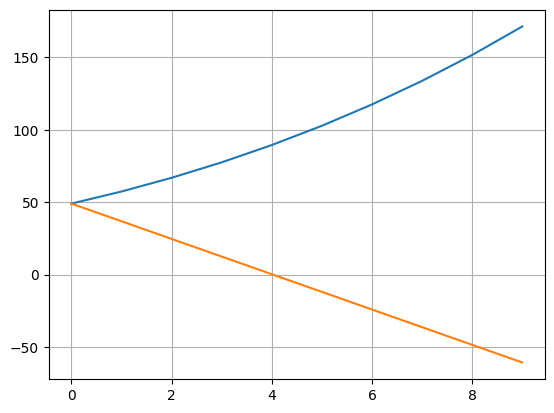

In [3]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

  def pv_derivative(self, r):
    sum = -self.maturity * 100 * m.pow(1+r, -self.maturity - 1)
    for i in range(1, self.maturity+1):
      sum += -i * self.coupon * m.pow(1+r, -i-1)
    return round(sum,2)

bond = Bond(10, 4)
# print(bond.pv(0.04))

price = 91
ir = range(10)

pvs = [bond.pv(i*0.01) - price for i in ir]
tangent = [bond.pv(0) - price + i*0.01*bond.pv_derivative(0) for i in ir]

plt.plot(ir, pvs)
plt.plot(ir, tangent)
plt.grid(True)
plt.show()

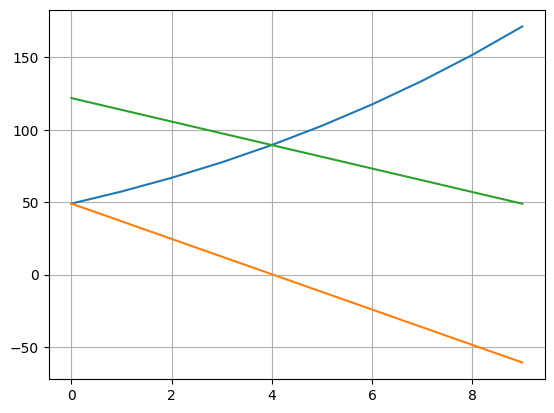

In [1]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

  def pv_derivative(self, r):
    sum = -self.maturity * 100 * m.pow(1+r, -self.maturity - 1)
    for i in range(1, self.maturity+1):
      sum += -i * self.coupon * m.pow(1+r, -i-1)
    return round(sum,2)

bond = Bond(10, 4)
# print(bond.pv(0.04))

price = 91
ir = range(10)

pvs = [bond.pv(i*0.01) - price for i in ir]
tangent = [bond.pv(0) - price + i*0.01*bond.pv_derivative(0) for i in ir]
tangent4 = [bond.pv(0.04) - price + (i-4)*0.01*bond.pv_derivative(0.04) for i in ir]

plt.plot(ir, pvs)
plt.plot(ir, tangent)
plt.plot(ir, tangent4)
plt.grid(True)
plt.show()

In [10]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    sum = 100*m.pow(1+r, self.maturity)
    for i in range(1, self.maturity+1):
      sum += self.coupon*m.pow(1+r, -i)
    return round(sum, 2)

  def pv_derivative(self, r):
    sum = -self.maturity * 100 * m.pow(1+r, -self.maturity - 1)
    for i in range(1, self.maturity+1):
      sum += -i * self.coupon * m.pow(1+r, -i-1)
    return round(sum,2)

  def ytm(self, price):
    x = 0.2
    while(abs(round(self.pv(x)-price,0))>0):
      x = x - (self.pv(x)-price)/self.pv_derivative(x)
      print(x)
    return x

bond = Bond(10, 4)
# print(bond.pv(0.04))

price = 91
ir = range(10)

ytm = bond.ytm(price)
print(ytm)
print(bond.pv(ytm))

pvs = [bond.pv(i*0.01) - price for i in ir]
tangent = [bond.pv(0) - price + i*0.01*bond.pv_derivative(0) for i in ir]
tangent4 = [bond.pv(0.04) - price + (i-4)*0.01*bond.pv_derivative(0.04) for i in ir]

# plt.plot(ir, pvs)
# plt.plot(ir, tangent)
# plt.plot(ir, tangent4)
# plt.axvline(x=ytm*100)
# plt.grid(True)
# plt.show()

3.045342522974102
272950700.8127844


ZeroDivisionError: float division by zero

Calculated YTM: 0.0518
PV at calculated YTM: 91.00


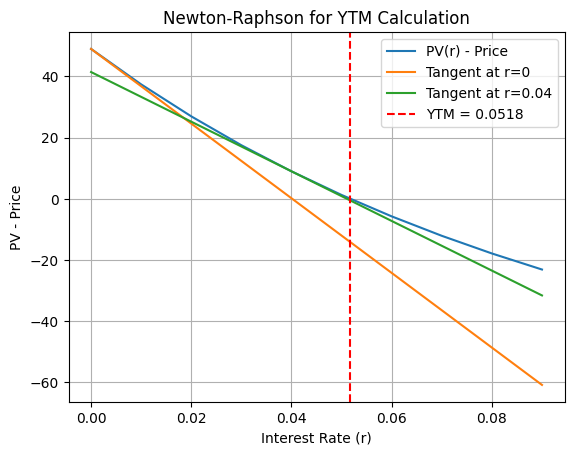

In [ ]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    # Corrected PV formula for a fixed coupon bond:
    # Face value discounted + sum of discounted coupon payments
    sum_pv = 100 * m.pow(1 + r, -self.maturity)
    for i in range(1, self.maturity + 1):
      sum_pv += self.coupon * m.pow(1 + r, -i)
    # Removed rounding here to maintain full precision for numerical methods
    return sum_pv

  def pv_derivative(self, r):
    # Corrected derivative for the pv function above:
    # Derivative of Face value discounted + sum of derivatives of discounted coupon payments
    sum_deriv = -self.maturity * 100 * m.pow(1 + r, -self.maturity - 1)
    for i in range(1, self.maturity + 1):
      sum_deriv += -i * self.coupon * m.pow(1 + r, -i - 1)
    # Removed rounding here for better precision in numerical method
    return sum_deriv

  def ytm(self, price, initial_guess=0.05, tolerance=1e-6, max_iterations=1000):
    x = initial_guess
    for iteration in range(max_iterations):
      f_x = self.pv(x) - price
      f_prime_x = self.pv_derivative(x)

      # Check for division by zero or very small derivative
      if abs(f_prime_x) < 1e-10: # A very small number close to zero
        print(f"Warning: Derivative very close to zero at iteration {iteration}. Returning current estimate.")
        return x # Return current estimate

      x_new = x - f_x / f_prime_x

      if abs(x_new - x) < tolerance:
        return x_new
      x = x_new
    print(f"Warning: Newton-Raphson did not converge within {max_iterations} iterations. Returning last estimate.")
    return x

bond = Bond(10, 4)

price = 91
# Use a list of actual interest rates for plotting, converted from percentage integers
ir = [i * 0.01 for i in range(10)]

# Calculate YTM using the corrected method
ytm = bond.ytm(price)
print(f"Calculated YTM: {ytm:.4f}")
print(f"PV at calculated YTM: {bond.pv(ytm):.2f}")

# Re-calculating for plotting with the corrected pv and pv_derivative
pvs = [bond.pv(i) - price for i in ir]

# Tangent at the first point in ir (r=0)
tangent = [bond.pv(ir[0]) - price + (rate_val - ir[0]) * bond.pv_derivative(ir[0]) for rate_val in ir]
# Tangent at r=0.04
tangent4 = [bond.pv(0.04) - price + (rate_val - 0.04) * bond.pv_derivative(0.04) for rate_val in ir]

plt.plot(ir, pvs, label='PV(r) - Price')
plt.plot(ir, tangent, label='Tangent at r=0')
plt.plot(ir, tangent4, label='Tangent at r=0.04')
plt.axvline(x=ytm, color='r', linestyle='--', label=f'YTM = {ytm:.4f}')
plt.xlabel('Interest Rate (r)')
plt.ylabel('PV - Price')
plt.title('Newton-Raphson for YTM Calculation')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    # Corrected PV formula for a fixed coupon bond:
    # Face value discounted + sum of discounted coupon payments
    sum_pv = 100 * m.pow(1 + r, -self.maturity)
    for i in range(1, self.maturity + 1):
      sum_pv += self.coupon * m.pow(1 + r, -i)
    # Removed rounding here to maintain full precision for numerical methods
    return sum_pv

  def pv_derivative(self, r):
    # Corrected derivative for the pv function above:
    # Derivative of Face value discounted + sum of derivatives of discounted coupon payments
    sum_deriv = -self.maturity * 100 * m.pow(1 + r, -self.maturity - 1)
    for i in range(1, self.maturity + 1):
      sum_deriv += -i * self.coupon * m.pow(1 + r, -i - 1)
    # Removed rounding here for better precision in numerical method
    return sum_deriv

  def ytm(self, price, initial_guess=0.05, tolerance=1e-6, max_iterations=1000):
    x = 0.2
    for iteration in range(max_iterations):
        f_x = self.pv(x) - price
        f_prime_x = self.pv_derivative(x)

      # Check for division by zero or very small derivative
      if abs(f_prime_x) < 1e-10: # A very small number close to zero
        print(f"Warning: Derivative very close to zero at iteration {iteration}. Returning current estimate.")
        return x # Return current estimate

      x_new = x - f_x / f_prime_x

      if abs(x_new - x) < tolerance:
        return x_new
      x = x_new
    print(f"Warning: Newton-Raphson did not converge within {max_iterations} iterations. Returning last estimate.")
    return x

bond = Bond(10, 4)

price = 91
# Use a list of actual interest rates for plotting, converted from percentage integers
ir = [i * 0.01 for i in range(10)]

# Calculate YTM using the corrected method
ytm = bond.ytm(price)
print(f"Calculated YTM: {ytm:.4f}")
print(f"PV at calculated YTM: {bond.pv(ytm):.2f}")

# Re-calculating for plotting with the corrected pv and pv_derivative
pvs = [bond.pv(i) - price for i in ir]

# Tangent at the first point in ir (r=0)
tangent = [bond.pv(ir[0]) - price + (rate_val - ir[0]) * bond.pv_derivative(ir[0]) for rate_val in ir]
# Tangent at r=0.04
tangent4 = [bond.pv(0.04) - price + (rate_val - 0.04) * bond.pv_derivative(0.04) for rate_val in ir]



KeyboardInterrupt: 

In [15]:
import math as m
import matplotlib.pyplot as plt

class Bond:
  def __init__(self, maturity, coupon):
    self.maturity=maturity
    self.coupon=coupon  #annual in %

  def pv(self, r):
    # Corrected PV formula for a fixed coupon bond:
    # Face value discounted + sum of discounted coupon payments
    sum_pv = 100 * m.pow(1 + r, -self.maturity)
    for i in range(1, self.maturity + 1):
      sum_pv += self.coupon * m.pow(1 + r, -i)
    # Removed rounding here to maintain full precision for numerical methods
    return sum_pv

  def pv_derivative(self, r):
    # Corrected derivative for the pv function above:
    # Derivative of Face value discounted + sum of derivatives of discounted coupon payments
    sum_deriv = -self.maturity * 100 * m.pow(1 + r, -self.maturity - 1)
    for i in range(1, self.maturity + 1):
      sum_deriv += -i * self.coupon * m.pow(1 + r, -i - 1)
    # Removed rounding here for better precision in numerical method
    return sum_deriv

  def ytm(self, price, initial_guess=0.05, tolerance=1e-6, max_iterations=1000):
    x = initial_guess
    for iteration in range(max_iterations):
      f_x = self.pv(x) - price
      f_prime_x = self.pv_derivative(x)

      # Check for division by zero or very small derivative
      if abs(f_prime_x) < 1e-10: # A very small number close to zero
        print(f"Warning: Derivative very close to zero at iteration {iteration}. Returning current estimate.")
        return x # Return current estimate

      x_new = x - f_x / f_prime_x

      if abs(x_new - x) < tolerance:
        return x_new
      x = x_new
    print(f"Warning: Newton-Raphson did not converge within {max_iterations} iterations. Returning last estimate.")
    return x

bond = Bond(10, 4)

price = 91
# Use a list of actual interest rates for plotting, converted from percentage integers
ir = [i * 0.01 for i in range(10)]

# Calculate YTM using the corrected method
ytm = bond.ytm(price)
print(f"Calculated YTM: {ytm:.4f}")
print(f"PV at calculated YTM: {bond.pv(ytm):.2f}")

# Re-calculating for plotting with the corrected pv and pv_derivative
pvs = [bond.pv(i) - price for i in ir]

# Tangent at the first point in ir (r=0)
tangent = [bond.pv(ir[0]) - price + (rate_val - ir[0]) * bond.pv_derivative(ir[0]) for rate_val in ir]
# Tangent at r=0.04
tangent4 = [bond.pv(0.04) - price + (rate_val - 0.04) * bond.pv_derivative(0.04) for rate_val in ir]

#plt.plot(ir, pvs, label='PV(r) - Price')
#plt.plot(ir, tangent, label='Tangent at r=0')
#plt.plot(ir, tangent4, label='Tangent at r=0.04')
#plt.axvline(x=ytm, color='r', linestyle='--', label=f'YTM = {ytm:.4f}')
#plt.xlabel('Interest Rate (r)')
#plt.ylabel('PV - Price')
#plt.title('Newton-Raphson for YTM Calculation')
#plt.grid(True)
#plt.legend()
#plt.show()

Calculated YTM: 0.0518
PV at calculated YTM: 91.00
